Name : Shubham Shaha

PRN : 240340128031

### Q1. Use following sentences to find the tf*idf vectorized data.

1. The postman delivered the package to the wrong address.

2. I wrapped a beautiful present for my friend's birthday.

3. The delivery truck arrived late due to heavy traffic.

4. We need to check the shipping address before sending the order.

5. Online shopping offers a wide variety of products with fast delivery.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
sent1 = ["The postman delivered the package to the wrong address.",
         "I wrapped a beautiful present for my friend's birthday.",
         "The delivery truck arrived late due to heavy traffic.",
         "We need to check the shipping address before sending the order.",
         "Online shopping offers a wide variety of products with fast delivery."]

tfidf = TfidfVectorizer()
new_data = tfidf.fit_transform(sent1)
df = pd.DataFrame(new_data.toarray(), columns = tfidf.get_feature_names_out())
df

,address,arrived,beautiful,before,birthday,check,delivered,delivery,due,fast,...,the,to,traffic,truck,variety,we,wide,with,wrapped,wrong
0,0.266921,0.000000,0.000000,0.000000,0.000000,0.000000,0.330842,0.000000,0.000000,0.000000,...,0.664706,0.221569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.330842
1,0.000000,0.000000,0.377964,0.000000,0.377964,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000
2,0.000000,0.363987,0.000000,0.000000,0.000000,0.000000,0.000000,0.293662,0.363987,0.000000,...,0.243766,0.243766,0.363987,0.363987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.256500,0.000000,0.000000,0.317925,0.000000,0.317925,0.000000,0.000000,0.000000,0.000000,...,0.425837,0.212918,0.000000,0.000000,0.000000,0.317925,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.259704,0.000000,0.321896,...,0.000000,0.000000,0.000000,0.000000,0.321896,0.000000,0.321896,0.321896,0.000000,0.000000


### Q2. Download the file spam_messages.csv from the link below:
https://mitu.co.in/dataset

This file contains the collection of spam and not spam (ham) messages received in
the mail box. Perform the following operations on it:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Read the file

In [4]:
df = pd.read_csv("spam_messages.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


2. Seperate input and output data

In [5]:
X = df['Message']
y = df['Category']

3. Explore the output data

<Axes: xlabel='Category', ylabel='count'>

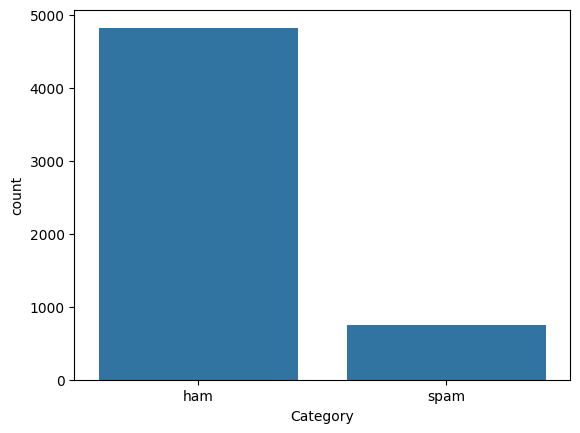

In [6]:
sns.countplot(x = y)

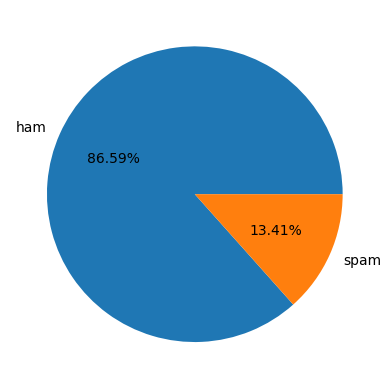

In [7]:
plt.pie(y.value_counts(), labels = y.value_counts().index,  autopct='%2.2f%%');

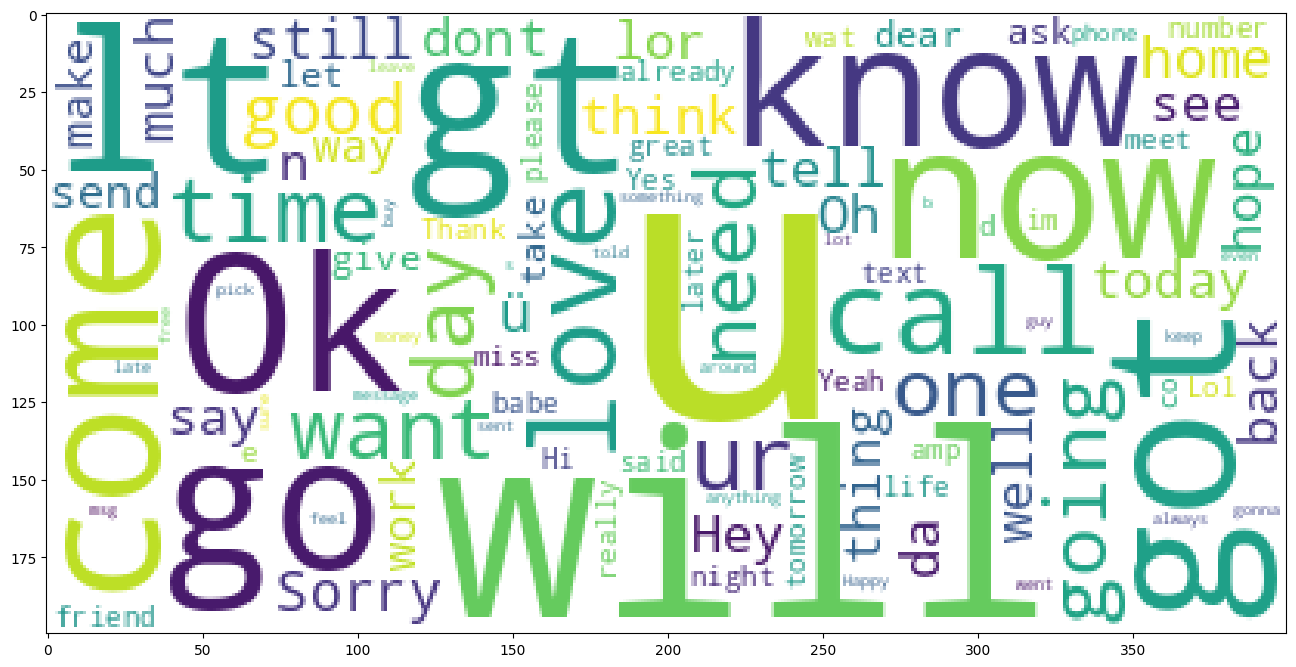

In [8]:
spam = X[y=='spam']
spam = " ".join(spam)

not_spam = X[y=='ham']
not_spam = " ".join(not_spam)

wc_notspam = WordCloud(background_color='white', max_words=100).generate(not_spam)

plt.figure(figsize= (16,9))
plt.imshow(wc_notspam)

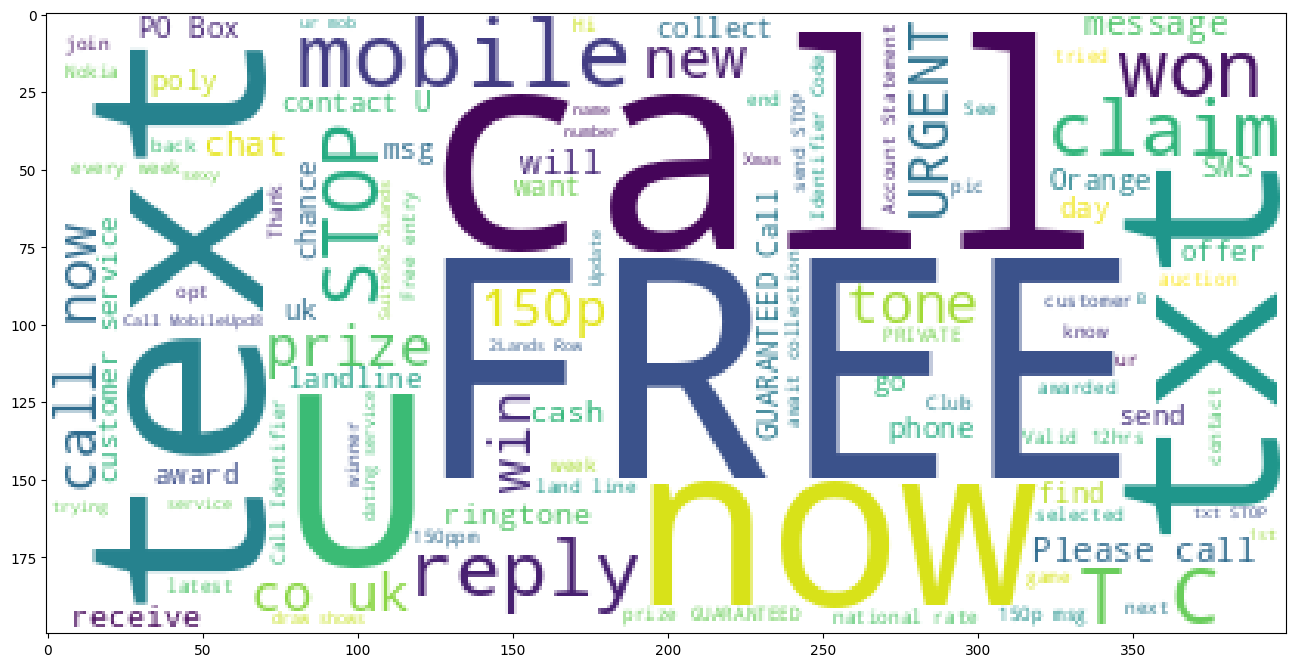

In [9]:
wc_spam = WordCloud(background_color='white', max_words=100).generate(spam)

plt.figure(figsize= (16,9))
plt.imshow(wc_spam)

4. Prepare and vectorize the data

In [10]:
## Cleaning and stemming
def clean_text(sent):
    tokens1 = word_tokenize(sent) ## tokenize
    tokens2 = [token for token in tokens1 if token.isalnum()] ## remove punctuations
    swords = stopwords.words('english')
    tokens3 = [token for token in tokens2 if token.lower() not in swords] ## Remove stopwords
    ps = PorterStemmer()
    tokens4 = [ps.stem(token) for token in tokens3] ## stemming
    return tokens4

## TFIDF vectorization
tfidf = TfidfVectorizer(analyzer = clean_text)
x_new = tfidf.fit_transform(X)
x_new

<5572x6852 sparse matrix of type '<class 'numpy.float64'>'
	with 47518 stored elements in Compressed Sparse Row format>

5. Cross validate the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, random_state = 0, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4179, 6852), (1393, 6852), (4179,), (1393,))

6. Build the Decision Tree model for classification

In [12]:
dtc = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

7. Evaluate the performance of algorithm

0.9533381191672649
              precision    recall  f1-score   support

         ham       0.97      0.98      0.97      1206
        spam       0.86      0.78      0.82       187

    accuracy                           0.95      1393
   macro avg       0.91      0.88      0.90      1393
weighted avg       0.95      0.95      0.95      1393



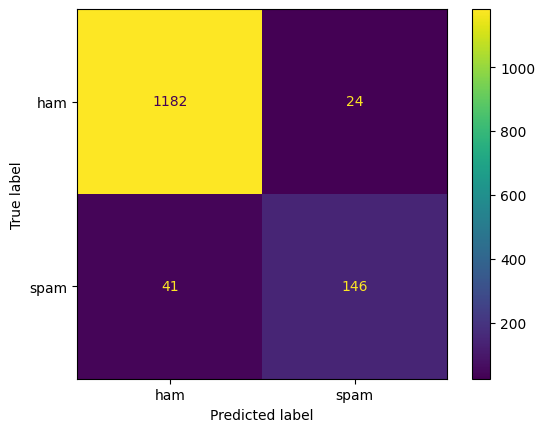

In [13]:
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

8. Download the file sample.csv which contains the unknown mails. Predict the
category of these mails.

In [14]:
valid = pd.read_csv("sample.csv",sep = '\t', header= None)
X_valid = tfidf.transform(valid[0])
y_pred = dtc.predict(X_valid)
y_pred

array(['ham', 'spam', 'ham'], dtype=object)